In [1]:
import atomica as at
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hbv_functions as hbv
%matplotlib inline

from collections import defaultdict
import os

## todo: create a new vaccination + treatment scenario - observe whether you need to reload the databook to make it wor

In [ ]:
F = at.ProjectFramework("hbv_v14_gamma_mav.xlsx")
D = at.ProjectData.from_spreadsheet('applications/region_amr/AMR_db_mav.xlsx', framework = F)
P = at.Project(framework=F, databook=D, sim_start=1990, sim_end=2099, sim_dt=0.25, do_run=False)

cal=P.make_parset()
cal.load_calibration('applications/region_amr/AMR_calib.xlsx')

In [ ]:
res = P.run_sim(parset=cal, result_name = 'original')

In [ ]:
d=at.PlotData([res], outputs=["treat"])
at.plot_series(d, data=P.data, axis="results")

In [ ]:
d=at.PlotData([res], outputs=["vax"])
at.plot_series(d, data=P.data, axis="results")

In [ ]:
d=at.PlotData([res], outputs=["hb3"])
at.plot_series(d, data=P.data, axis="results")

In [ ]:
d=at.PlotData([res], outputs=["bd"])
at.plot_series(d, data=P.data, axis="results")

In [ ]:
d=at.PlotData([res], outputs=["t_cov_hb"])
at.plot_series(d, data=P.data, axis="results")

In [ ]:
d=at.PlotData([res], outputs=["treat_cov"])
at.plot_series(d, data=P.data, axis="results")

In [ ]:
d=at.PlotData([res], outputs=["t_cov_net"])
at.plot_series(d, data=P.data, axis="results")

In [ ]:
D1 = at.ProjectData.from_spreadsheet('applications/region_amr/AMR_db_mav.xlsx', framework = F)

#### For vaccinations, use bd and hb3



In [ ]:
D1.tdve['bd'].ts[1]

In [ ]:
cov_dict = defaultdict(lambda: [])
t_dict = defaultdict(lambda: [])
assump_dict = defaultdict(lambda: None)
assert cov_dict.keys() == t_dict.keys(), 'why'

#### For treatments, use t_cov_net, treat_cov, t_cov_hb

maybe also mav?

In [ ]:
cov_dict.keys() == t_dict.keys()

In [ ]:
set(D.pops)

In [ ]:
set(assump_dict.keys()) == {'0-4M', '0-4F', '5-14M', '5-14F',\
                            '15-49M', '15-49F', '50-69M', '50-69F', \
                           '70+M', '70+F'}

In [ ]:
assump_dict['0-4M'] = 0

In [ ]:
for pop in cov_dict.keys():
    print(pop)

### Scenario-maker function

In [ ]:
at.TimeSeries([2020, 2025, 2030], [2000, 3000, 4000], assumption = 10)

In [ ]:
D.tdve['bd'].ts['0-4M'].units

In [ ]:
def scenario_edit(D, par, cov_dict = defaultdict(lambda: []), t_dict = defaultdict(lambda: []), assump_dict = defaultdict(lambda: None)):
    '''
    
    '''
    assert cov_dict.keys() == t_dict.keys(), 'cov and t dict must have the same pops!'
    tmp = D.tdve[par].ts['0-4M'].units
    
    for pop in cov_dict.keys():
        D.tdve[par].ts[pop] = at.TimeSeries(t_dict[pop], cov_dict[pop], units = tmp)
        
    for pop in assump_dict.keys():
        D.tdve[par].ts[pop] = at.TimeSeries([], [], units = tmp, assumption = assump_dict[pop])
        
    return D

In [ ]:
cov_dict = defaultdict(lambda: [])
t_dict = defaultdict(lambda: [])
assump_dict = defaultdict(lambda: None)

for sx in ['M', 'F']:
    assump_dict[f'0-4{sx}'] = 0

In [ ]:
fw_loc = "hbv_v14_gamma_mav.xlsx"
db_loc = 'applications/region_amr/AMR_db_mav.xlsx'
D1 = at.ProjectData.from_spreadsheet('applications/region_amr/AMR_db_mav.xlsx', framework = F)
D1 = scenario_edit(D1, 'bd', assump_dict = assump_dict)
D1 = scenario_edit(D1, 'hb3', assump_dict = assump_dict)

In [ ]:
P1 = at.Project(framework=F, databook=D1, sim_start=1990, sim_end=2099, sim_dt=0.25, do_run=False)

In [ ]:
res1 = P1.run_sim(parset=cal, result_name = 'New')

In [ ]:
assump_dict.keys()

In [ ]:
D1.tdve['bd'].ts['0-4M'] = at.TimeSeries([], [], units = 'N.A.', assumption = 0)

In [ ]:
D1.tdve['bd'].ts['0-4M']

In [ ]:
D1.tdve['hb3'].ts['0-4M']

In [ ]:
D.tdve['hb3'].ts

In [ ]:
D1.tdve['hb3'].ts

In [ ]:
d=at.PlotData([res, res1], outputs=["vax"])
at.plot_series(d, data=P.data, axis="results")

### Run this section of code!

In [2]:
db_loc = 'applications/region_amr/AMR_db_mav.xlsx'

In [3]:
def scenario_edit(D, par, cov_dict = defaultdict(lambda: []), t_dict = defaultdict(lambda: []), assump_dict = defaultdict(lambda: None)):
    '''
    
    '''
    assert cov_dict.keys() == t_dict.keys(), 'cov and t dict must have the same pops!'
    tmp = D.tdve[par].ts['0-4M'].units
    
    for pop in cov_dict.keys():
        D.tdve[par].ts[pop] = at.TimeSeries(t_dict[pop], cov_dict[pop], units = tmp)
        
    for pop in assump_dict.keys():
        D.tdve[par].ts[pop] = at.TimeSeries([], [], units = tmp, assumption = assump_dict[pop])
        
    return D

In [8]:
def no_vax_scenario(db_loc, fw_loc = "hbv_v14_gamma_mav.xlsx", keep_db = False):
    # adjust the two vaccination components to zero (bd, hb3)
    assump_dict = {}

    for sx in ['M', 'F']:
        assump_dict[f'0-4{sx}'] = 0
    
    F = at.ProjectFramework("hbv_v14_gamma_mav.xlsx")
    D = at.ProjectData.from_spreadsheet(db_loc, framework = F)
    D = scenario_edit(D, 'bd', assump_dict = assump_dict)
    D = scenario_edit(D, 'hb3', assump_dict = assump_dict)
    D.save('tmp_databook.xlsx')
    D = at.ProjectData.from_spreadsheet('tmp_databook.xlsx', framework = F)
    
    
    
    # Remove the temporary databook (you can choose to keep it too by commenting this out)
    if keep_db == False:
        os.remove('tmp_databook.xlsx')
    # save new db and reload it to return it!
    return D
    
def no_treat_scenario(db_loc, fw_loc = "hbv_v14_gamma_mav.xlsx", keep_db = False):
    # adjust the two vaccination components to zero (bd, hb3)
    F = at.ProjectFramework("hbv_v14_gamma_mav.xlsx")
    D = at.ProjectData.from_spreadsheet(db_loc, framework = F)
    
    assump_dict = {}
    
    for pop in D.pops:
        assump_dict[pop] = 0
    
    D = scenario_edit(D, 't_cov_net', assump_dict = assump_dict)
    D = scenario_edit(D, 't_cov_hb', assump_dict = assump_dict)
    D.save('tmp_databook.xlsx')
    D = at.ProjectData.from_spreadsheet('tmp_databook.xlsx', framework = F)
    
    # Remove the temporary databook (you can choose to keep it too by commenting this out)
    if keep_db == False:
        os.remove('tmp_databook.xlsx')
    # save new db and reload it to return it!
    return D

C:\Users\iamph\Miniconda3\lib\site-packages\atomica\framework.py:914: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for to_comp, par_names in from_row.iteritems():
C:\Users\iamph\Miniconda3\lib\site-packages\atomica\framework.py:914: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for to_comp, par_names in from_row.iteritems():


Object saved to C:\Users\iamph\Documents\GitHub\hbv-globalinvcase\tmp_databook.xlsx.
Elapsed time for running "default": 3.43s


[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

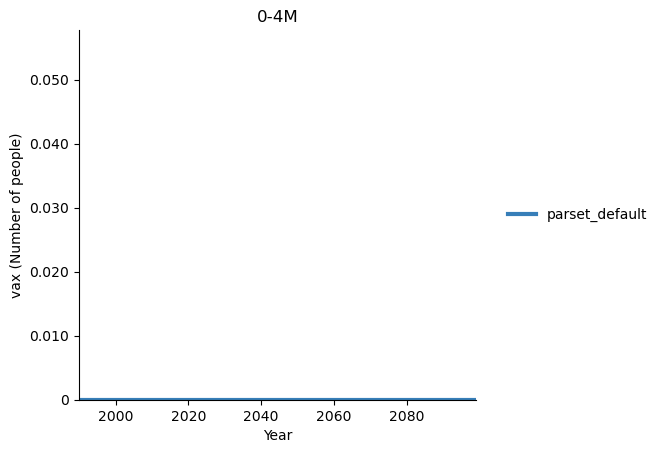

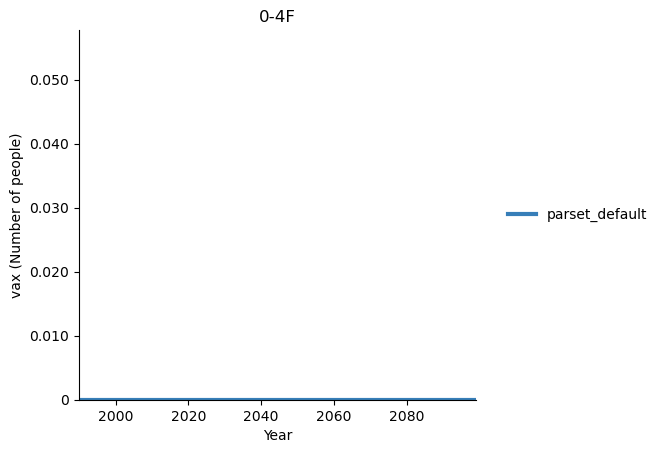

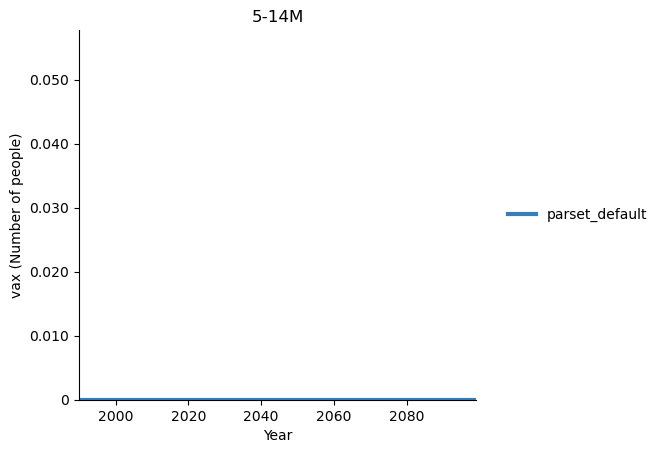

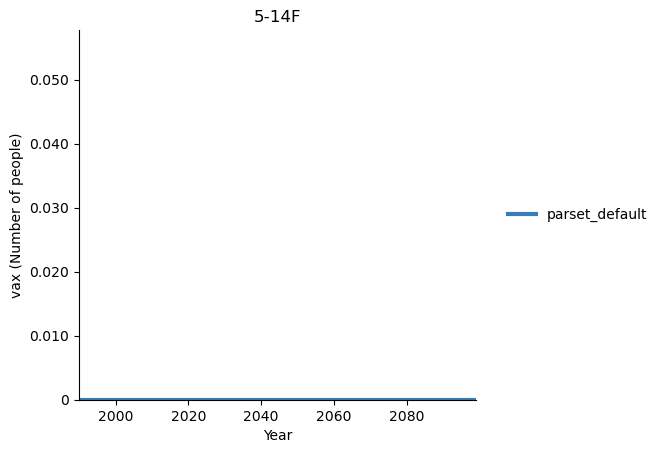

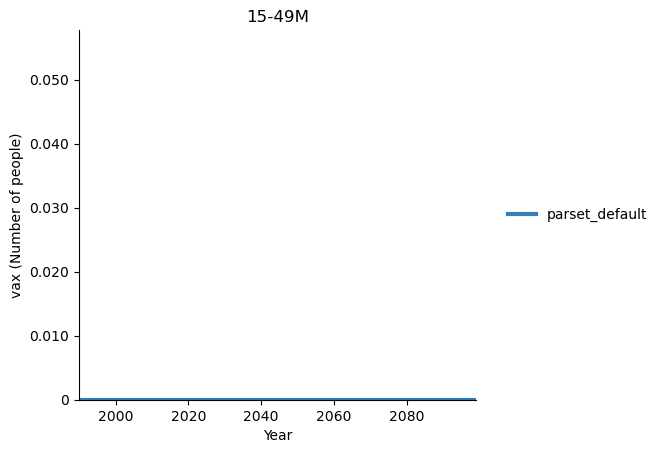

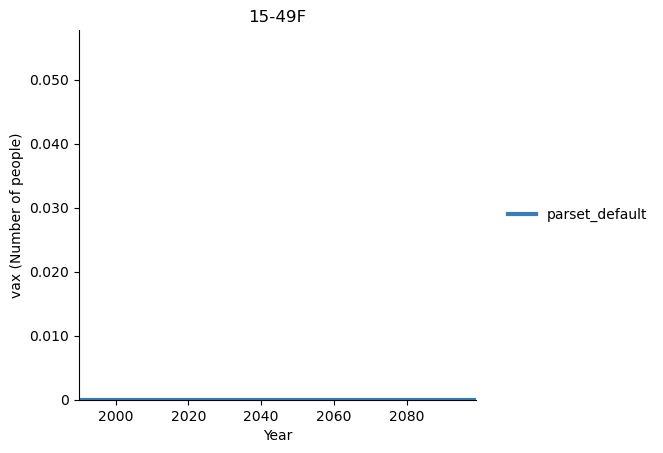

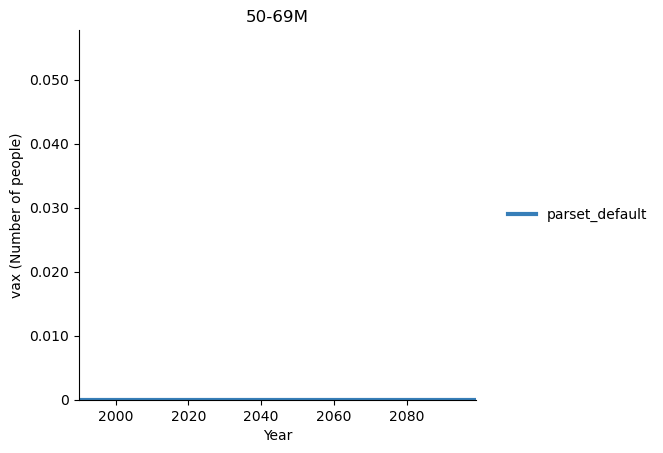

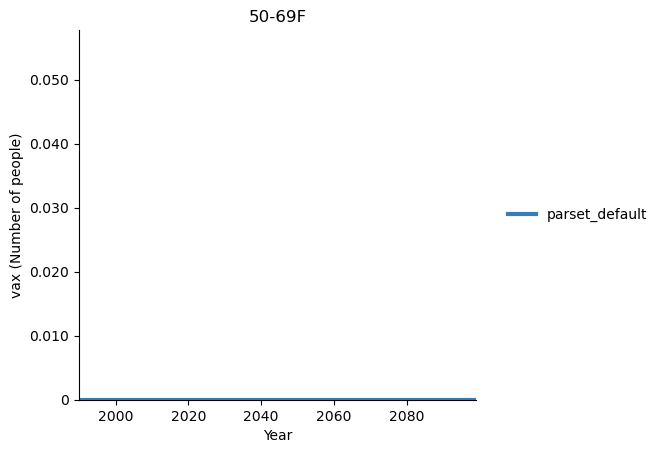

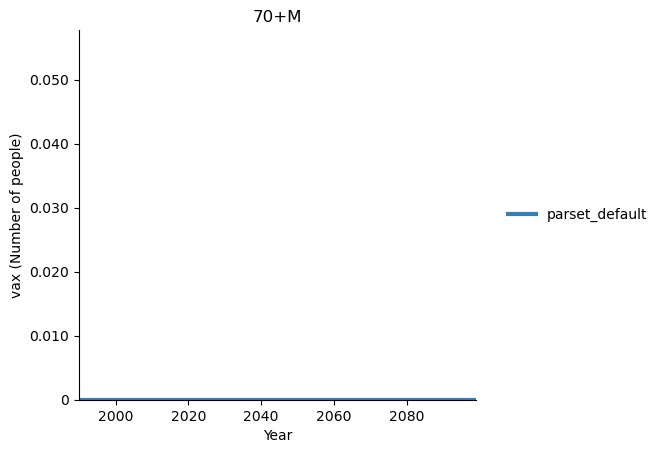

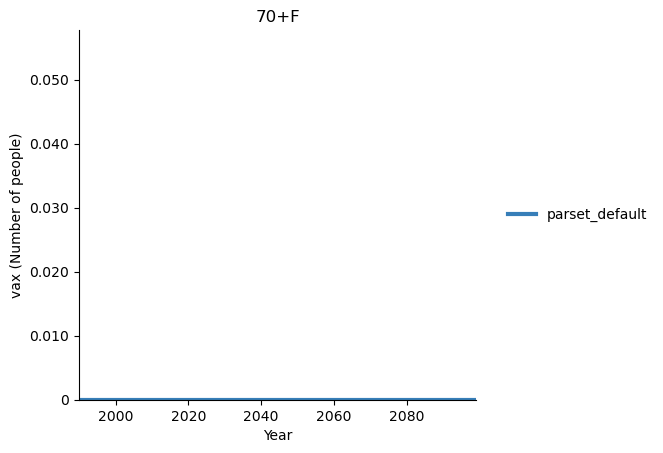

In [9]:
F = at.ProjectFramework("hbv_v14_gamma_mav.xlsx")
D = no_vax_scenario('applications/region_amr/AMR_db_mav.xlsx')
P = at.Project(framework=F, databook=D, sim_start=1990, sim_end=2099, sim_dt=0.25, do_run=False)

cal=P.make_parset()
cal.load_calibration('applications/region_amr/AMR_calib.xlsx')

res = P.run_sim(parset=cal)

d=at.PlotData([res], outputs=["vax"])
at.plot_series(d, data=P.data, axis="results")

C:\Users\iamph\Miniconda3\lib\site-packages\atomica\framework.py:914: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for to_comp, par_names in from_row.iteritems():
C:\Users\iamph\Miniconda3\lib\site-packages\atomica\framework.py:914: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for to_comp, par_names in from_row.iteritems():


Object saved to C:\Users\iamph\Documents\GitHub\hbv-globalinvcase\tmp_databook.xlsx.
Elapsed time for running "default": 3.63s


[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

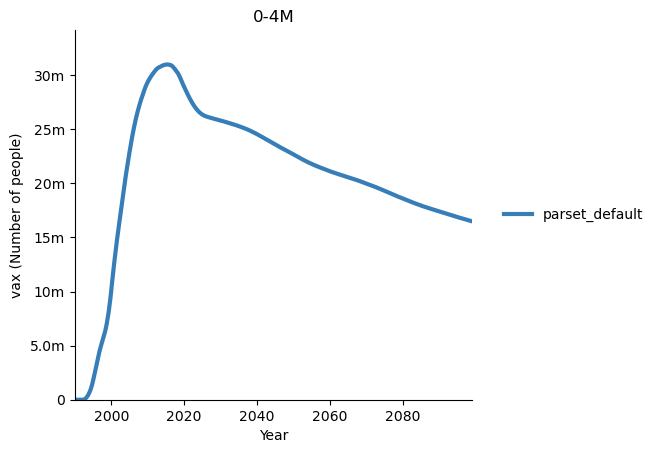

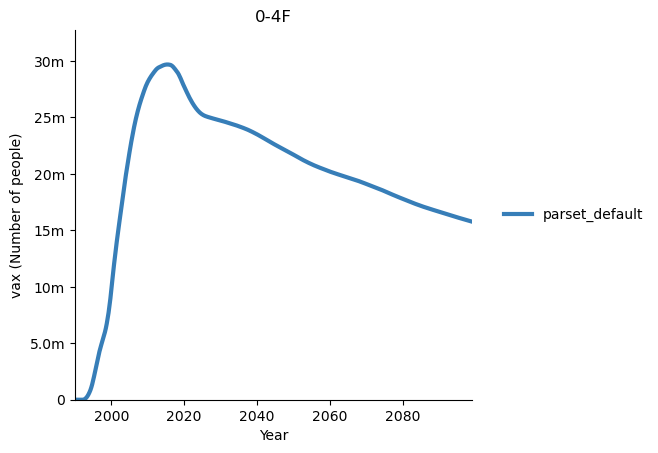

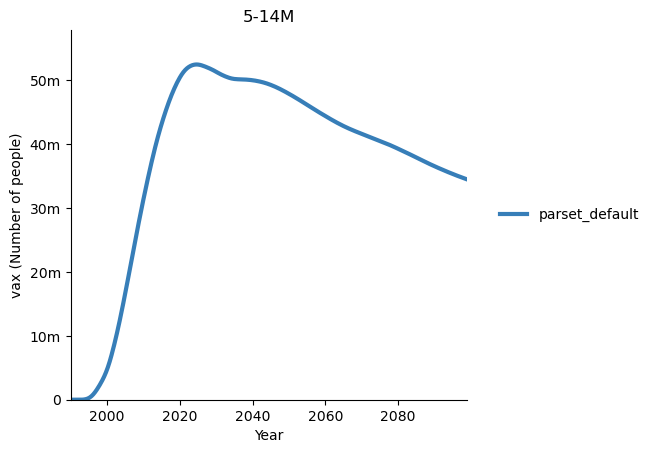

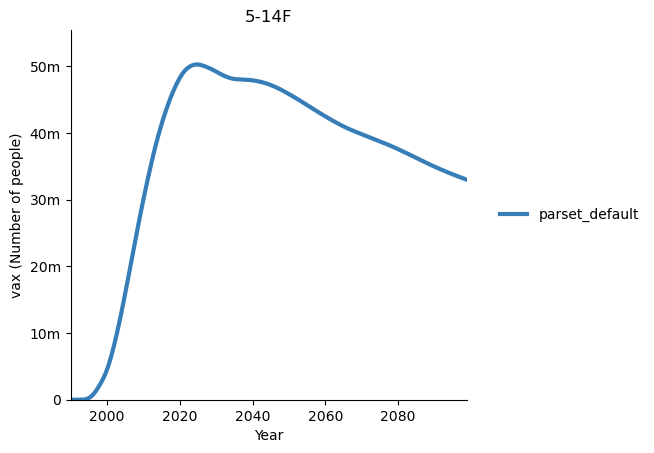

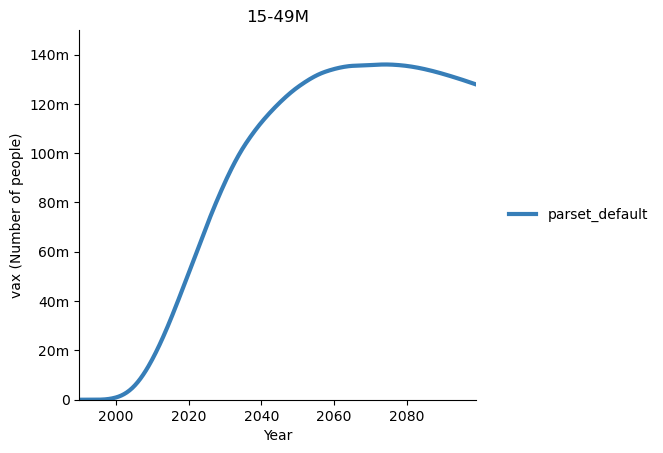

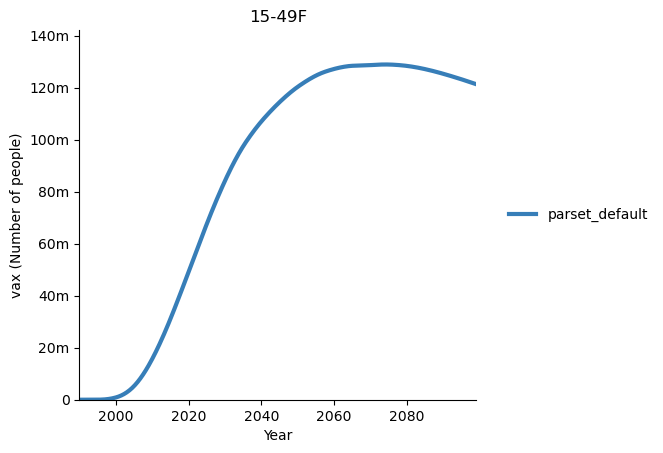

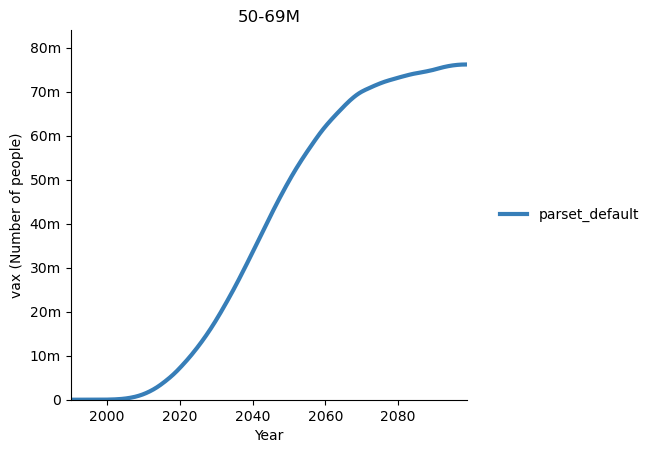

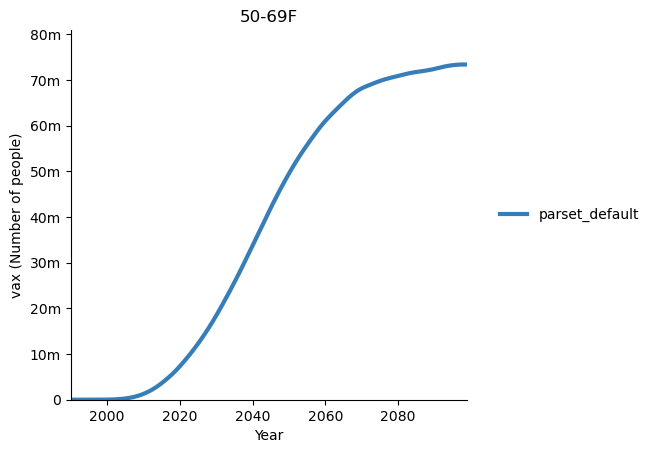

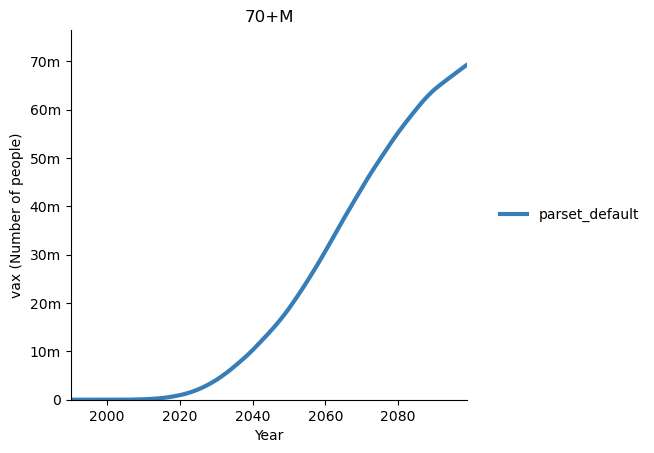

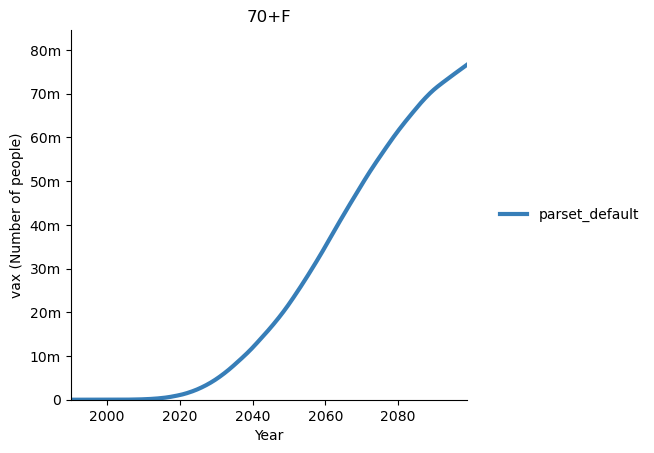

In [11]:
F = at.ProjectFramework("hbv_v14_gamma_mav.xlsx")
D = no_treat_scenario('applications/region_amr/AMR_db_mav.xlsx')
P = at.Project(framework=F, databook=D, sim_start=1990, sim_end=2099, sim_dt=0.25, do_run=False)

cal=P.make_parset()
cal.load_calibration('applications/region_amr/AMR_calib.xlsx')

res = P.run_sim(parset=cal)

d=at.PlotData([res], outputs=["vax"])
at.plot_series(d, data=P.data, axis="results")

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

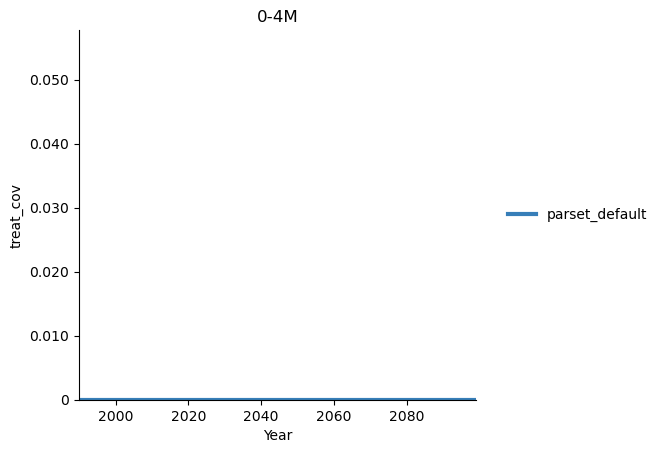

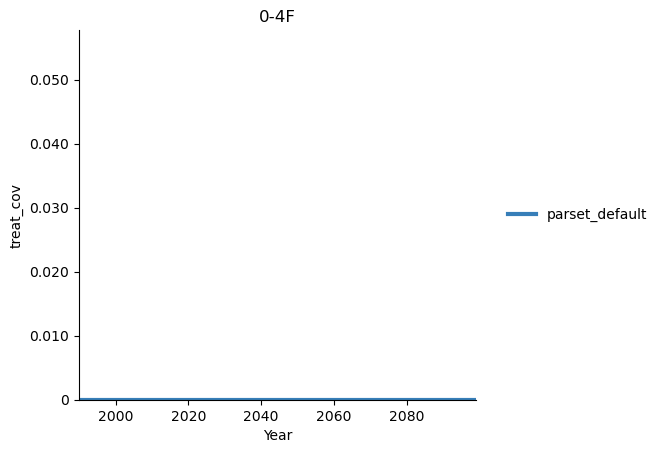

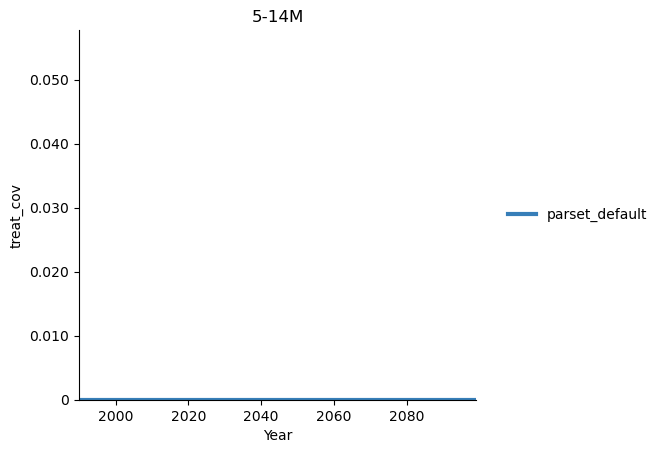

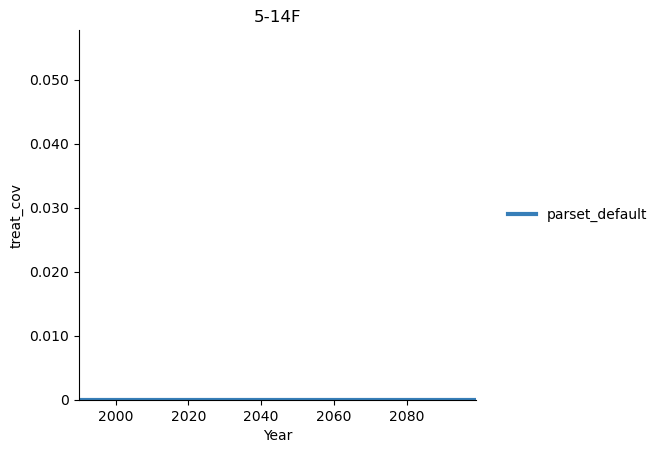

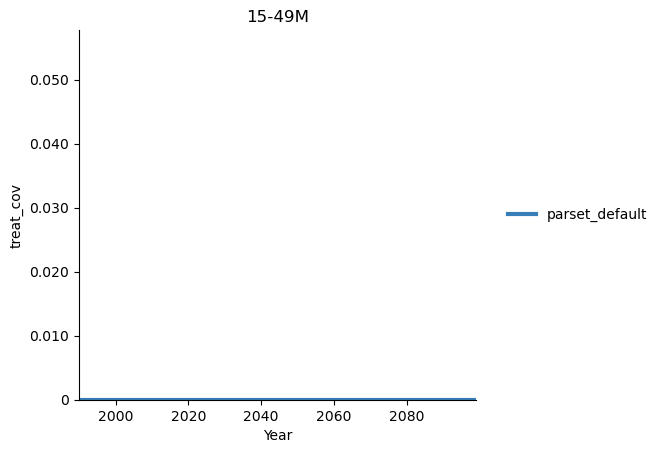

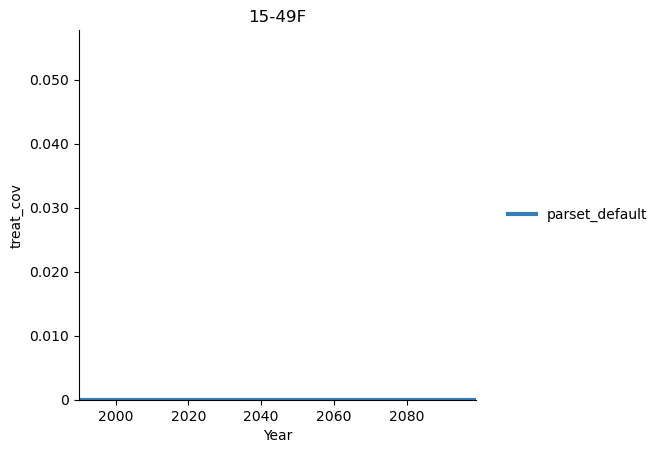

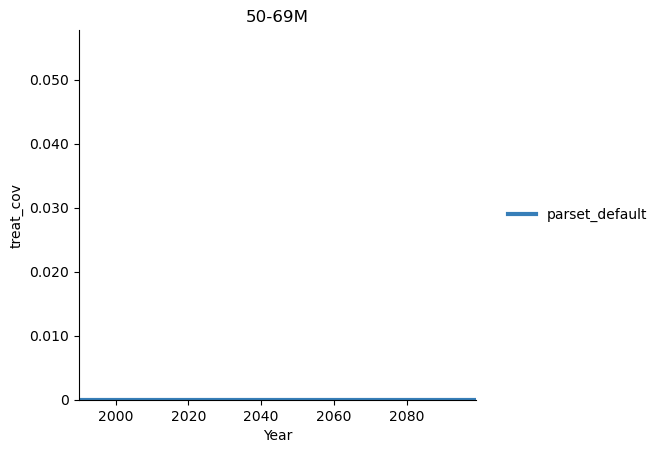

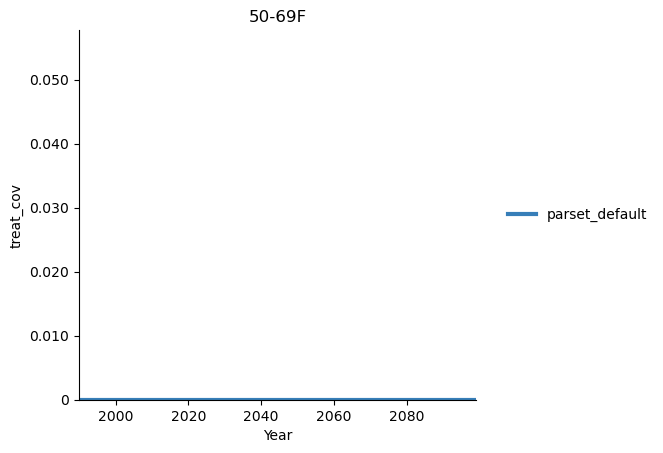

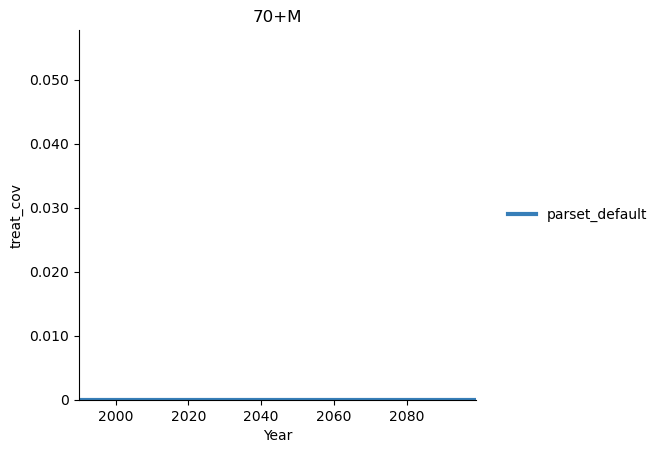

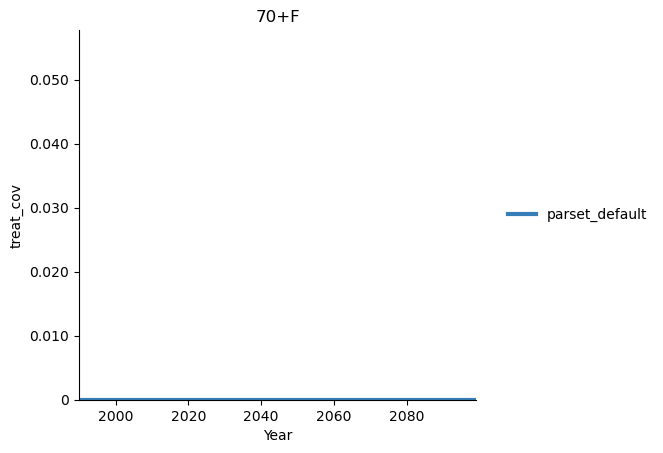

In [12]:
d=at.PlotData([res], outputs=["treat_cov"])
at.plot_series(d, data=P.data, axis="results")